###Chapter 14 in Machine Learning in Action 

    Covers dimension reduction using SVD

In [292]:
import pandas as pd
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
%pylab inline
pl.gray();
%matplotlib

Populating the interactive namespace from numpy and matplotlib
Using matplotlib backend: MacOSX


In [2]:
#df = pd.read_csv('/Users/Alexander/DSCI6003-student/week1/exercise/data/book_reviews.csv', index_col = True)
df = pd.read_csv('/Users/Alexander/DSCI6003-student/week1/exercise/data/book_reviews.csv')



In [3]:
df.columns

Index([u'Unnamed: 0', u'User-ID', u'ISBN', u'Book-Rating'], dtype='object')

In [4]:
## row = user_ID
## column = Book rating 

In [5]:
df = df.drop('Unnamed: 0', axis = 1)
df.columns = ['User','Book','Rating']

In [6]:
df.head()

,User,Book,Rating
0,277195,0060391626,10
1,277195,0060502258,0
2,277195,0060987561,0
3,277195,0316666343,0
4,277195,0316734837,0


In [7]:
df_pivot = df.pivot('User','Book')['Rating']
df_pivot = df_pivot.fillna(-1);
df_pivot.head()

Book,0006493580,000649840X,0006512135,0006513204,0006514855,0006547834,0006550576,0006550681,0006550789,0007110928,...,8495618605,8497593588,8804342838,8806142100,8806143042,8807813025,8817106100,8845205118,8873122933,8885989403
User,,,,,,,,,,,,,,,,,,,,,
243,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
254,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
507,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
638,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
805,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [8]:
# we can see that it is a very spars data set
df_pivot.describe()

,0006493580,000649840X,0006512135,0006513204,0006514855,0006547834,0006550576,0006550681,0006550789,0007110928,...,8495618605,8497593588,8804342838,8806142100,8806143042,8807813025,8817106100,8845205118,8873122933,8885989403
count,2500.0000,2500.0000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,...,2500.0000,2500.000000,2500.0000,2500.000000,2500.000000,2500.000,2500.0000,2500.0000,2500.000000,2500.000000
mean,-0.9864,-0.9492,-0.996400,-0.984400,-0.986000,-0.978800,-0.983600,-0.975600,-0.978400,-0.975200,...,-0.9984,-0.995200,-0.9972,-0.992800,-0.992800,-0.996,-0.9960,-0.9996,-0.996000,-0.999200
std,0.3057,0.5983,0.059904,0.372306,0.330224,0.412818,0.353527,0.444391,0.391401,0.443016,...,0.0800,0.183277,0.1400,0.254508,0.256075,0.200,0.1811,0.0200,0.063132,0.028279
min,-1.0000,-1.0000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.0000,-1.000000,-1.0000,-1.000000,-1.000000,-1.000,-1.0000,-1.0000,-1.000000,-1.000000
25%,-1.0000,-1.0000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.0000,-1.000000,-1.0000,-1.000000,-1.000000,-1.000,-1.0000,-1.0000,-1.000000,-1.000000
50%,-1.0000,-1.0000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.0000,-1.000000,-1.0000,-1.000000,-1.000000,-1.000,-1.0000,-1.0000,-1.000000,-1.000000
75%,-1.0000,-1.0000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.0000,-1.000000,-1.0000,-1.000000,-1.000000,-1.000,-1.0000,-1.0000,-1.000000,-1.000000
max,8.0000,10.0000,0.000000,9.000000,10.000000,10.000000,10.000000,10.000000,9.000000,10.000000,...,3.0000,8.000000,6.0000,8.000000,9.000000,9.000,8.0000,0.0000,0.000000,0.000000


In [9]:
U,S,Vtrans = np.linalg.svd(df_pivot)

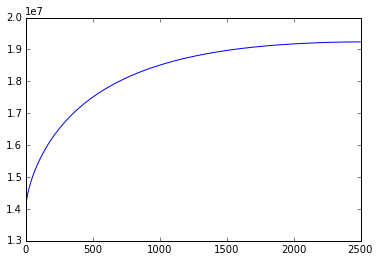

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(np.cumsum(S**2))

Total energy is the sum of the energy of each singular value.  Plot the energy of each singular value and look for the 'elbow'.  How many singular values should you keep?

First calculate the energy that each singular value represents.  Energy is the same as variance of a dimension and we can compute it simply by squaring the singular values.

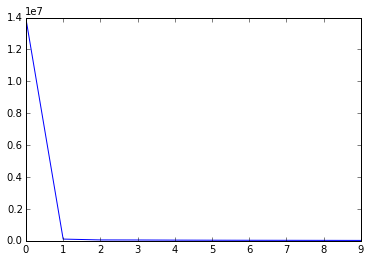

In [11]:
energy = S**2
plt.plot(energy[:10])

In [12]:
energy.size

2500

In [13]:
from __future__ import division

In [14]:
energy

array([  1.39276730e+07,   1.07691352e+05,   5.48392259e+04, ...,
         8.75634390e+00,   6.94934238e+00,   5.09470755e+00])

In [15]:
def ninty_per_var(energy):
    '''
    Input: array of sorted eigenvalues from SVD
    Output: index of largest eigenvalue, largest eigenvalue, percent variance retained  
    '''
    ninty = 0.90 * sum(energy)
    Sum = 0.0
    for i, lam in enumerate(energy):
        Sum = Sum + lam
        if (Sum >= ninty):
            print 'index             ',i
            print 'eigenvalue        ',lam
            print 'variance retained ',100*Sum/sum(energy)
            return i
            break

In [16]:
ninty_per_var(energy)

print '\nWe need to keep 441 eigenvalues in order to retain 90.0% of the variance'

index              441
eigenvalue         3370.45828287
variance retained  90.0117756326

We need to keep 441 eigenvalues in order to retain 90.0% of the variance


In [17]:
k = 441

In [18]:
df_pivot.shape

(2500, 6092)

##Dimenion Reduction 

###D = U, S, Vtrans
  
(m x n) = (m x m )  (m x n)  (n x n)

(m x n) = (m x k )  (k x k)  (k x n)

k = 441  

In [19]:
energy_r = energy[:k]
VtR = Vtrans[:k,:]
Ur = U[:,:k]

In [20]:
df_pivot.head(1)

Book,0006493580,000649840X,0006512135,0006513204,0006514855,0006547834,0006550576,0006550681,0006550789,0007110928,...,8495618605,8497593588,8804342838,8806142100,8806143042,8807813025,8817106100,8845205118,8873122933,8885989403
User,,,,,,,,,,,,,,,,,,,,,
243,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [21]:
df_pivot.shape
print "Rows: Users {0}        Cols: Books {1}".format(df_pivot.shape[0],df_pivot.shape[1])

Rows: Users 2500        Cols: Books 6092


In [22]:
# every row in Ur connects Users to Concepts
Ur.shape
print 'Rows: Users {0}        Cols: Features_Books  {1}'.format(Ur.shape[0],Ur.shape[1])

Rows: Users 2500        Cols: Features_Books  441


In [23]:
# every row in Vr connects books to concepts
VtR.shape
print 'Rows: Features_Books  {1}        Cols: Books {0}'.format(VtR.shape[0],VtR.shape[1])

Rows: Features_Books  6092        Cols: Books 441


6.Pick a number of Singular values to keep (doesn't have to be as many give 90% total energy).  Look at V to find which books most contribute to each 'topic'.  For each of these 'topics', print out the title and author of the 10 most relevant books.  __Note: You can get the book metadata from the `data/book_meta.csv` file__

In [24]:
a = []

In [25]:
a.append([4,4])
a.append([5,5,])

In [26]:
a

[[4, 4], [5, 5]]

In [27]:
VtR.shape

(441, 6092)

In [28]:
V = pd.DataFrame(VtR)
## each each row is a topic/combination of features (author, genre)
## each col is a book

# for each row, find 10 most relevent books

# row_sums = np.empty(V.shape[1]) # initialize array
# # find 10 largest values in each row
# for i, row in enumerate(VtR):
#     row_sums[i] = np.sum(row)
    
most_rel_books = []
book_temp = []
N = 10

for row in VtR:
    Row = row.tolist() # topic_i
    for i in range(N):
        book_temp.append(np.argmax(Row))
        Row.pop(np.argmax(Row))
    most_rel_books.append(book_temp) # 10 most relevent books to topic_i
    book_temp = [] 
# result: 441 rows (features) each having 10 cols (relevent books)

# match those 10 largest values to the books (cols)
# use meta data to identify the topic of each row

#### MATCHING

# use book_index from V to identify corresponding ISBN in df_pivot
# use ISBN to Identify book in meta data file
# use 10 most relevent books to identify each topic (create df, then read off(infer) topics )






In [29]:
df_pivot.head(2)

Book,0006493580,000649840X,0006512135,0006513204,0006514855,0006547834,0006550576,0006550681,0006550789,0007110928,...,8495618605,8497593588,8804342838,8806142100,8806143042,8807813025,8817106100,8845205118,8873122933,8885989403
User,,,,,,,,,,,,,,,,,,,,,
243,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
254,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [30]:
df_pivot.iloc[243][0]

-1.0

In [31]:
booksR = df_pivot.columns[:]

In [32]:
booksR[6034] # this is the brige between book index in Vt and book ISBN in df_pivot
             # now make a list (same shape as most_rel_books?) filled with corresponding ISBN's

'3423105518'

In [33]:
# contains 10 most relevent ISBN's from each row in topic space
most_rel_isbn = []
temp_isbn = []
for row in most_rel_books:
    for col in row:
        temp_isbn.append(booksR[col])
    most_rel_isbn.append(temp_isbn)
    temp_isbn = []

In [34]:
print 'rows',len(most_rel_isbn)
print 'cols',len(most_rel_isbn[0])

rows 441
cols 10


In [35]:
print 'rows',len(most_rel_books)
print 'cols',len(most_rel_books[0])

rows 441
cols 10


In [428]:
most_rel_isbn;

In [429]:
# contains indicies of 10 most relevent books form each row in topic space
most_rel_books;

In [43]:
meta = pd.read_csv('/Users/Alexander/Downloads/book_meta.csv', delimiter = ';', error_bad_lines = False)

Skipping line 227933: expected 10 fields, saw 11



Now that we have decomposed our matrices, let us try to examine the 'concept/topic' space. Each row of U connects users to concepts, and each row of V connects books to concepts. Examine U and V.

In [39]:
topic = pd.read_csv('data/book_meta.csv', delimiter=';', error_bad_lines=False, usecols=['ISBN', 'Book-Title','Book-Author','Year-Of-Publication','Publisher'])
                                                                                        

Skipping line 227933: expected 10 fields, saw 11

//anaconda/lib/python2.7/site-packages/pandas/io/parsers.py:1164: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


In [40]:
# title_author = []
# temp = []
# for row in most_rel_isbn:
#     for col in row:
#         for i, isbn in enumerate(topic.ISBN):
#             if isbn == col:
#                 temp.append([topic['Book-Title'][i],topic['Book-Author'][i]])
#     title_author.append(temp)             

In [41]:
topic.iloc[243]

ISBN                                                          140003180X
Book-Title             The Kalahari Typing School for Men (No. 1 Ladi...
Book-Author                                       ALEXANDER MCCALL SMITH
Year-Of-Publication                                                 2004
Publisher                                                         Anchor
Name: 243, dtype: object

In [44]:
metaspace = topic.set_index('ISBN')

In [45]:
metaspace.head(2)

,Book-Title,Book-Author,Year-Of-Publication,Publisher
ISBN,,,,
0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada


In [430]:
most_rel_isbn;

In [47]:
print 'Author:  ',metaspace['Book-Author']['8804342838']
print 'Book:    ',metaspace['Book-Title']['8804342838']

Author:   Andrea De Carlo
Book:     Due di due (Bestsellers)


In [51]:
topicspace = []
temp = []
isbn_error =[]
for row in most_rel_isbn:
    for isbn in row:
        try:
            temp.append([metaspace['Book-Title'][isbn],metaspace['Book-Author'][isbn]])
        except:
            isbn_error.append(isbn)
    topicspace.append(temp)
    temp = []

In [52]:
book_topic_space = pd.DataFrame(topicspace)

In [53]:
topicspace[50] # the 50th topic 

[['Divine Secrets of the Ya-Ya Sisterhood: A Novel', 'Rebecca Wells'],
 ['Circle of Friends', 'Maeve Binchy'],
 ['The Celestine Prophecy', 'James Redfield'],
 ['Guardian Angel', 'Sara Paretsky'],
 ['Castle of Wizardry (The Belgariad, Book 4)', 'David Eddings'],
 ["A Maiden's Grave", 'Jeff Deaver'],
 ['Desperation', 'Stephen King'],
 ['Doctor Zhivago', 'BORIS PASTERNAK'],
 ['The Bone Collector (Lincoln Rhyme Novels (Paperback))', 'Jeff Deaver'],
 ['Tales of a Fourth Grade Nothing', 'JUDY BLUME']]

###Book Topic Space

Row1 appears to be comprised of forigen books 

Row2 appears to be comprised of death novels 

Row3 appears to be comprised of murder thrillers

In [54]:
# each row is a book topic
# each row contains the 10 most relevent authors in that specific book space
book_topic_space.head(3)

,0,1,2,3,4,5,6,7,8,9
0,"[Name Der Rose, Umberto Eco]",[Monsieur Ibrahim und die Blumen des Koran. Er...,"[Das Geisterhaus. Roman., Isabel Allende]","[Due di due (Bestsellers), Andrea De Carlo]","[Der Vorleser, Bernhard Schlink]",[New Vegetarian: Bold and Beautiful Recipes fo...,[Je Voudrais Que Quelqu'un M'Attende Quelque P...,"[Schlafes Bruder, Robert Schneider]",None,None
1,"[The Red Tent (Bestselling Backlist), Anita Di...","[1st to Die: A Novel, James Patterson]","[Oryx and Crake, Margaret Atwood]","[The Virgin Suicides, Jeffrey Eugenides]","[FLOOD TIDE, Clive Cussler]","[Nobody's Fool (Vintage Contemporaries), Richa...",[Kristy's Great Idea (The Baby-Sitter's Club #...,"[Beneath the Skin, Nicci French]","[Pay It Forward, Catherine Ryan Hyde]","[Arranged Marriage: Stories, Chitra Banerjee D..."
2,[Dance upon the Air (Three Sisters Island Tril...,"[Headwind, John J. Nance]","[Heart of the Sea (Irish Trilogy), Nora Roberts]","[Jewels of the Sun (Irish Trilogy), Nora Roberts]","[Once upon a Midnight, Nora Roberts]",[The Soldier Spies (Men at War (Paperback Jove...,"[Acid Row, Minette Walters]","[Headhunters, Jules Bass]",[Eleventh Hour: An FBI Thriller (FBI Thriller ...,"[Purity in Death, J.D. Robb]"


###Relating Users to Book Topic Space

In [ ]:
Ur = Ur.T

In [55]:
# every row in Ur connects Users to Concepts
# by taking the transpose, we can apply the same steps as used for Vtrans 
print 'Rows: Users {0}        Cols: Features  {1}'.format(Ur.shape[0],Ur.shape[1])

Rows: Users 2500        Cols: Features  441


In [56]:
Ur.shape

(2500, 441)

In [57]:
Ur

array([[-0.02033966,  0.00327259, -0.0055954 , ..., -0.01323167,
         0.01012999,  0.00793676],
       [-0.01995877,  0.00508901, -0.0124744 , ..., -0.00329457,
         0.0269036 ,  0.02002854],
       [-0.02021076, -0.00307725,  0.00203474, ...,  0.01494965,
        -0.0279363 ,  0.01868414],
       ..., 
       [-0.02044646, -0.00206253,  0.00515836, ..., -0.01529038,
         0.01391078,  0.01083859],
       [-0.02015641,  0.00300546, -0.00986437, ...,  0.00976956,
        -0.01524418,  0.0423071 ],
       [-0.02051077,  0.00098357, -0.00135933, ..., -0.00886136,
        -0.00024606,  0.01587149]])

In [58]:
# # find 10 largest values in each row
most_rel_users = []
user_temp = []
N = 10
for row in Ur:
    Row = row.tolist() # user_j , 2500 users
    for _ in range(N): # feature_i , 10 features
        user_temp.append(np.argmax(Row))
        Row.pop(np.argmax(Row))
    most_rel_users.append(user_temp) # 10 most relevent books to topic_i
    user_temp = [] 

# result: 441 rows (features) each having 10 cols (relevent users)

# match those 10 largest values to the users (cols)
# use meta data to identify the topic of each row

#### MATCHING

# use book_index from Ur to identify corresponding Uers in df_pivot
# use ISBN to Identify book in meta data file
# use 10 most relevent books to identify each topic (create df, then read off(infer) topics )

In [59]:
# Type of books will reflect topic favored by user 
print len(most_rel_users)    # num of users
print len(most_rel_users[0]) # num of books per user
most_rel_users[10]           # indcies of books that are associated with the prefered 
                             # topic space of each 2500 users

2500
10


[311, 385, 313, 25, 385, 361, 216, 429, 239, 409]

In [60]:
# contains 10 most relevent ISBN's for each book in each user's favored topic space
most_rel_isbn_user = []
temp_isbn = []
for row in most_rel_users:  # 2500 rows/users
    for col in row:         # 10 cols/books 
        temp_isbn.append(booksR[col])
    most_rel_isbn_user.append(temp_isbn)
    temp_isbn = []

In [61]:
#most_rel_isbn_user ## contains 10 books for each 2500 users

In [62]:
print len(most_rel_isbn_user)
print len(most_rel_isbn_user[0])
print type(most_rel_isbn_user[0][0])

2500
10
<type 'str'>


In [63]:
most_rel_isbn_user[0][0]

'0064405176'

In [64]:
topic_space_user = []
temp = []
user_error =[]
for user in most_rel_isbn_user: # i_user out of 2500
    for isbn in user:           # j_book out of 10
        try:
            temp.append([metaspace['Book-Title'][isbn],metaspace['Book-Author'][isbn]])
        except:
            user_error.append(isbn)
    topic_space_user.append(temp)
    temp = []

In [65]:
topic_space_user[35] ## books prefered by user 35
                     ## women's interest literature 

[['Circle of Three: A Novel', 'Patricia Gaffney'],
 ['Stuart Little', 'E. B. White'],
 ['The Terrible Hours', 'Peter Maas'],
 ['The Silver Chair', 'C. S. Lewis'],
 ['Little Town on the Prairie', 'Laura Ingalls Wilder'],
 ['Catherine, Called Birdy (Trophy Newbery)', 'Karen Cushman'],
 ["The Woman's Comfort Book : A Self-Nurturing Guide for Restoring Balance in Your Life",
  'Jennifer Louden'],
 ['Divine Secrets of the Ya-Ya Sisterhood: A Novel', 'Rebecca Wells'],
 ["Carpenter's Lady, The, NEW EDITION", 'Barbara Delinsky'],
 ['The Secret Garden', 'Frances Hodgson Burnett']]

In [66]:
user_topic = pd.DataFrame(topic_space_user)

In [67]:
user_topic.tail(2)

,0,1,2,3,4,5,6,7,8,9
2498,"[The Bean Trees, Barbara Kingsolver]","[Fault Lines, Anne Rivers Siddons]","[Joshua, Joseph F Girzone]","[Angus, Thongs and Full-Frontal Snogging: Conf...","[The Vendetta Defense, Lisa Scottoline]",[Dragonwings : Golden Mountain Chronicles: 190...,"[Lost, Gregory Maguire]","[The Saving Graces: A Novel, Patricia Gaffney]","[A Little Princess, Frances Hodgson Burnett]","[CADDIE WOODLAWN, Carol Ryrie Brink]"
2499,"[The Magician's Nephew (Narnia), C. S. Lewis]",[Prince Caspian (rack) : The Return to Narnia ...,"[Switcheroo : A Novel, Olivia Goldsmith]","[Finding Moon, Tony Hillerman]","[Equal Rites (Discworld Novels (Paperback)), T...","[The Yearling (Scribner Classics), Marjorie Ki...","[Catherine, Called Birdy (Trophy Newbery), Kar...","[When Strangers Marry, Lisa Kleypas]","[To Cut a Long Story Short, Jeffrey Archer]","[Running from the Law, Lisa Scottoline]"


You can map a new user into 'concept space' by multiplying by V. Create a new user (or take an existing one) and map them into 'concept space' by multiplying their rating vector by V. What is their representation in this new space?

maping any given user onto concept space will result 

##Extra: Visualizing High Dimensional Data

In [222]:
import os
path = '/Users/Alexander/DSCI6003-student/week1/exercise/data/senate/'
filelist = os.listdir(path)
df_dic = {f_id:pd.read_csv(path+file) for f_id, file in enumerate(filelist)}
senate = pd.concat(df_dic)

In [223]:
import regex as re

In [224]:
#re bin / relable all the vote items
#make a list comprehension to filter through all the column names to find the relveant ones

vote_col = [col for col in senate.columns if re.search(r'[vV]',col) ]
nonvote_col = [col for col in senate.columns if not re.search(r'[vV]',col) ]

In [225]:
nonvote_col[:7]

['Unnamed: 0', 'attainoffice', 'cong', 'congress', 'dist', 'eh1', 'eh2']

In [229]:
vote_df = senate[vote_col]
nonvote_df = senate[nonvote_col]

In [236]:
nonvote_df.loc[10].head()

,Unnamed: 0,attainoffice,cong,congress,dist,eh1,eh2,id,idno,lstate,name,occup,occupancy,office,party,state,statenm
0,1,NaN,111,NaN,0,0,0,99911,NaN,USA,OBAMA,NaN,NaN,NaN,100,99,NaN
1,2,NaN,111,NaN,0,0,1,49700,NaN,ALABAMA,SESSIONS,NaN,NaN,NaN,200,41,NaN
2,3,NaN,111,NaN,0,0,1,94659,NaN,ALABAMA,SHELBY,NaN,NaN,NaN,200,41,NaN
3,4,NaN,111,NaN,0,0,1,40300,NaN,ALASKA,MURKOWSKI,NaN,NaN,NaN,200,81,NaN
4,5,NaN,111,NaN,0,0,1,40900,NaN,ALASKA,BEGICH,NaN,NaN,NaN,100,81,NaN


In [235]:
vote_df.loc[10].head()

,V1,V10,V100,V101,V102,V103,V104,V105,V106,V107,...,var90,var91,var92,var93,var94,var95,var96,var97,var98,var99
0,9,9,1,9,9,9,9,9,9,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6,6,1,1,6,6,6,6,6,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6,6,1,6,6,6,6,1,1,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,6,1,1,1,1,1,1,1,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,1,1,1,1,6,1,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [239]:
# drop all of the Na
N = 10
vote_dict = {}
for i in range(N+1):
    df_temp = vote_df.loc[i].dropna(axis = 1)
    vote_dict[i] = df_temp

In [243]:
vote_dict[10].head()

,V1,V10,V100,V101,V102,V103,V104,V105,V106,V107,...,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99
0,9,9,1,9,9,9,9,9,9,1,...,9,9,9,9,9,9,9,1,1,9
1,6,6,1,1,6,6,6,6,6,6,...,1,1,1,6,1,6,6,6,1,6
2,6,6,1,6,6,6,6,1,1,6,...,6,1,1,6,1,6,1,6,6,6
3,1,6,1,1,1,1,1,1,1,6,...,1,1,1,6,6,6,1,6,1,1
4,1,1,1,1,1,6,1,1,1,1,...,6,6,1,1,6,1,1,1,1,1


In [248]:
senate_dict = {}
N = 10
for k,df in vote_dict.iteritems():
    new_df = df.replace([1,2,3,4,5,6,7,8,9],[1,1,1,-1,-1,-1,0,0,0])
    senate_dict[k] = new_df
    

In [263]:
senate_dict[10].head()

,V1,V10,V100,V101,V102,V103,V104,V105,V106,V107,...,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99
0,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,1,0
1,-1,-1,1,1,-1,-1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,-1,-1,1,-1
2,-1,-1,1,-1,-1,-1,-1,1,1,-1,...,-1,1,1,-1,1,-1,1,-1,-1,-1
3,1,-1,1,1,1,1,1,1,1,-1,...,1,1,1,-1,-1,-1,1,-1,1,1
4,1,1,1,1,1,-1,1,1,1,1,...,-1,-1,1,1,-1,1,1,1,1,1


####Calling the 101st Congress

In [259]:
import sklearn as sk
from sklearn.decomposition import PCA
from sklearn.lda import LDA

In [268]:
senate_dict[0].shape

(103, 638)

In [407]:
pca = PCA(n_components = 2)

In [408]:
pca.fit(senate_dict[0])

PCA(copy=True, n_components=2, whiten=False)

In [409]:
X = pca.transform(senate_dict[0])

In [410]:
x = X[:,0].reshape(103,1)
y = X[:,1].reshape(103,1)

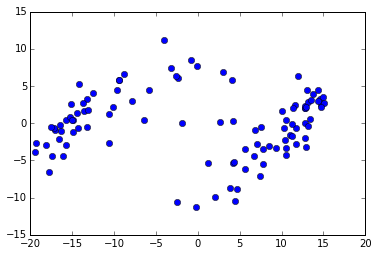

In [411]:
plt.plot(x,y,'o');

In [351]:
senate_dict[10].head()

,V1,V10,V100,V101,V102,V103,V104,V105,V106,V107,...,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99
0,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,1,0
1,-1,-1,1,1,-1,-1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,-1,-1,1,-1
2,-1,-1,1,-1,-1,-1,-1,1,1,-1,...,-1,1,1,-1,1,-1,1,-1,-1,-1
3,1,-1,1,1,1,1,1,1,1,-1,...,1,1,1,-1,-1,-1,1,-1,1,1
4,1,1,1,1,1,-1,1,1,1,1,...,-1,-1,1,1,-1,1,1,1,1,1


In [404]:
sen_print = []
N = 10
for i in range(N+1):
    pca = PCA(n_components = 2)
    pca.fit(senate_dict[i])
    X = pca.transform(senate_dict[i])
    x = X[:,0]
    y = X[:,1]
    
    sen_print.append([x,y])

In [405]:
#sen_print[df][col][value]

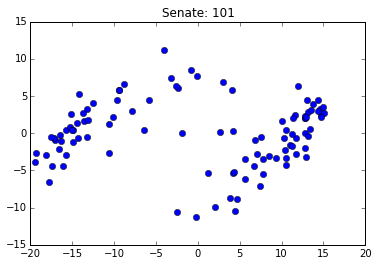

In [414]:
plt.plot(sen_print[0][0],sen_print[0][1],'o')
plt.title('Senate: 101')
    

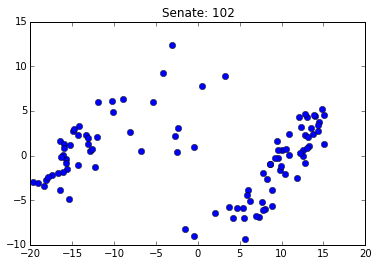

In [417]:
plt.plot(sen_print[1][0],sen_print[1][1],'o')
plt.title('Senate: 102')

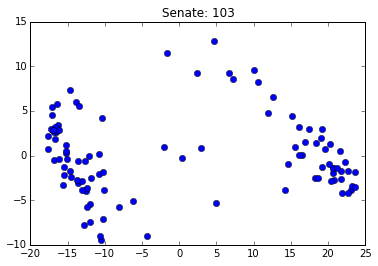

In [418]:
plt.plot(sen_print[2][0],sen_print[2][1],'o')
plt.title('Senate: 103')

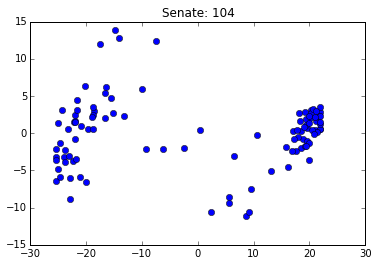

In [419]:
plt.plot(sen_print[3][0],sen_print[3][1],'o')
plt.title('Senate: 104')

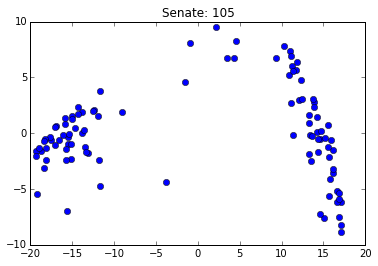

In [420]:
plt.plot(sen_print[4][0],sen_print[4][1],'o')
plt.title('Senate: 105')

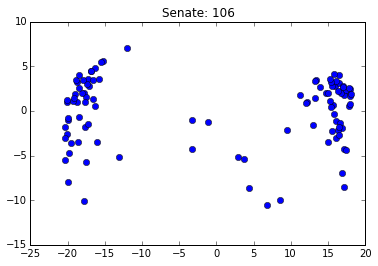

In [421]:
plt.plot(sen_print[5][0],sen_print[5][1],'o')
plt.title('Senate: 106')

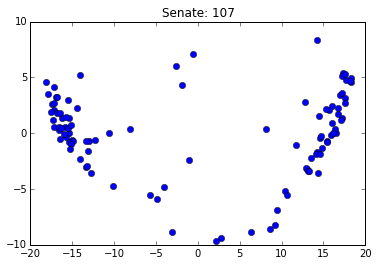

In [422]:
plt.plot(sen_print[6][0],sen_print[6][1],'o')
plt.title('Senate: 107')

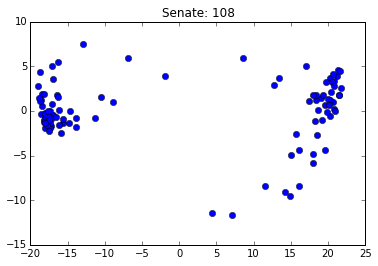

In [423]:
plt.plot(sen_print[7][0],sen_print[7][1],'o')
plt.title('Senate: 108')

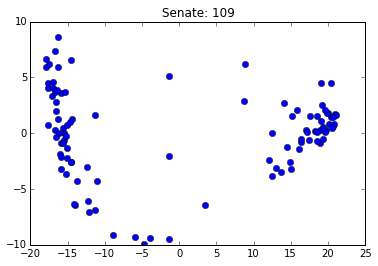

In [424]:
plt.plot(sen_print[8][0],sen_print[8][1],'o')
plt.title('Senate: 109')

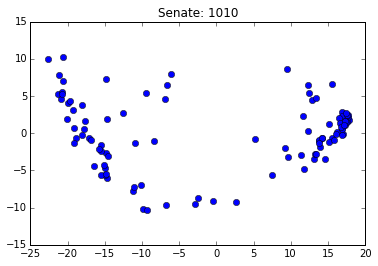

In [425]:
plt.plot(sen_print[9][0],sen_print[9][1],'o')
plt.title('Senate: 101')

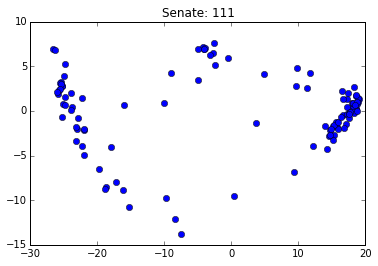

In [426]:
plt.plot(sen_print[10][0],sen_print[10][1],'o')
plt.title('Senate: 111')